# Daily NY Subway Entries vs Citi Bike Trips between March and May 2020

## Importing MTA Data from SQL DB

In [1]:
import pandas as pd
import datetime as dt
import sqlite3

In [2]:
con = sqlite3.connect("mta_data.db")

query = '''
SELECT *
from mta_data;
'''

# Load the data into a DataFrame
df = pd.read_sql_query(query, con)

con.close()

## Data cleaning - remove duplicate entries

In [3]:
mta = df.copy()

In [4]:
# Merge DATE and TIME columns and convert to datetime data type
mta["DATE_TIME"] = pd.to_datetime(mta.DATE + " " + mta.TIME)
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685526 entries, 0 to 2685525
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 245.9+ MB


In [5]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
426632,H009,R235,00-03-00,BEDFORD AV,2020-03-22 12:00:00,2
504107,J009,R378,00-00-01,MYRTLE AV,2020-05-27 05:00:00,2
863197,N120A,R153,01-00-00,UTICA AV,2020-04-17 05:00:00,2
0,A002,R051,02-00-00,59 ST,2020-02-29 03:00:00,1
1790348,R141,R031,00-03-00,34 ST-PENN STA,2020-04-15 16:00:00,1


In [6]:
# On 3/22/2020, we seem to have two entries for same time.  Let's take a look
mask = ((mta["C/A"] == "H009") & 
(mta["UNIT"] == "R235") & 
(mta["SCP"] == "00-03-00") & 
(mta["STATION"] == "BEDFORD AV") &
(mta["DATE_TIME"].dt.date == dt.datetime(2020, 3, 22).date()))

mta[mask].head(7)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1893568,H009,R235,00-03-00,BEDFORD AV,L,BMT,03/22/2020,00:00:00,REGULAR,17126296,22672766,2020-03-22 00:00:00
1893569,H009,R235,00-03-00,BEDFORD AV,L,BMT,03/22/2020,04:00:00,REGULAR,17126296,22672770,2020-03-22 04:00:00
1893570,H009,R235,00-03-00,BEDFORD AV,L,BMT,03/22/2020,08:00:00,REGULAR,17126296,22672779,2020-03-22 08:00:00
1893571,H009,R235,00-03-00,BEDFORD AV,L,BMT,03/22/2020,12:00:00,REGULAR,17126296,22672798,2020-03-22 12:00:00
1893572,H009,R235,00-03-00,BEDFORD AV,L,BMT,03/22/2020,12:00:00,RECOVR AUD,19676995,30044802,2020-03-22 12:00:00
1893573,H009,R235,00-03-00,BEDFORD AV,L,BMT,03/22/2020,16:00:00,RECOVR AUD,19676995,30044806,2020-03-22 16:00:00
1893574,H009,R235,00-03-00,BEDFORD AV,L,BMT,03/22/2020,20:00:00,REGULAR,17126296,22672815,2020-03-22 20:00:00


In [7]:
# On 5/27/2020, we seem to have two entries for same time.  Let's take a look
mask = ((mta["C/A"] == "J009") & 
(mta["UNIT"] == "R378") & 
(mta["SCP"] == "00-00-01") & 
(mta["STATION"] == "MYRTLE AV") &
(mta["DATE_TIME"].dt.date == dt.datetime(2020, 5, 27).date()))

mta[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
40877,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,01:00:00,REGULAR,3047244,2109618,2020-05-27 01:00:00
40878,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,05:00:00,REGULAR,3047247,2109623,2020-05-27 05:00:00
40879,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,05:00:00,RECOVR AUD,3047246,2109623,2020-05-27 05:00:00
40880,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,09:00:00,REGULAR,3047363,2109697,2020-05-27 09:00:00
40881,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,13:00:00,REGULAR,3047424,2109765,2020-05-27 13:00:00


In [8]:
# On 4/17/2020, we seem to have two entries for same time.  Let's take a look
mask = ((mta["C/A"] == "N120A") & 
(mta["UNIT"] == "R153") & 
(mta["SCP"] == "01-00-00") & 
(mta["STATION"] == "UTICA AV") &
(mta["DATE_TIME"].dt.date == dt.datetime(2020, 4, 17).date()))

mta[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1309538,N120A,R153,01-00-00,UTICA AV,AC,IND,04/17/2020,01:00:00,REGULAR,3377207,2331545,2020-04-17 01:00:00
1309539,N120A,R153,01-00-00,UTICA AV,AC,IND,04/17/2020,05:00:00,REGULAR,3377210,2331552,2020-04-17 05:00:00
1309540,N120A,R153,01-00-00,UTICA AV,AC,IND,04/17/2020,05:00:00,RECOVR AUD,3377209,2331552,2020-04-17 05:00:00
1309541,N120A,R153,01-00-00,UTICA AV,AC,IND,04/17/2020,09:00:00,REGULAR,3377242,2331599,2020-04-17 09:00:00
1309542,N120A,R153,01-00-00,UTICA AV,AC,IND,04/17/2020,13:00:00,REGULAR,3377258,2331640,2020-04-17 13:00:00


Since we are only taking the last reading of ENTRIES for each day, we should be okay to remove these duplicate records.

In [9]:
# Get rid of the duplicate entry, and sort by date
mta.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ignore_index=True)
mta.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [10]:
# Sanity Check again to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-02-29 03:00:00,1
1790362,R141,R031,00-03-00,34 ST-PENN STA,2020-04-18 00:00:00,1
1790344,R141,R031,00-03-00,34 ST-PENN STA,2020-04-15 00:00:00,1
1790345,R141,R031,00-03-00,34 ST-PENN STA,2020-04-15 04:00:00,1
1790346,R141,R031,00-03-00,34 ST-PENN STA,2020-04-15 08:00:00,1


In [11]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
mta = mta.drop(["EXITS", "DESC"], axis=1, errors="ignore")

## Calculate daily entries

In [109]:
mta_daily = mta.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE']).ENTRIES.max().reset_index()
mta_daily.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,02/29/2020,7395518
1,A002,R051,02-00-00,59 ST,NQR456W,03/01/2020,7396077
2,A002,R051,02-00-00,59 ST,NQR456W,03/02/2020,7397350
3,A002,R051,02-00-00,59 ST,NQR456W,03/03/2020,7398638
4,A002,R051,02-00-00,59 ST,NQR456W,03/04/2020,7399918


In [110]:
mta_daily[["PREV_DATE", "PREV_ENTRIES"]] = (mta_daily
                                            .groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME"])["DATE", "ENTRIES"]
                                            .apply(lambda grp: grp.shift(1)))
mta_daily

<ipython-input-110-72bf1e6f956b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_daily[["PREV_DATE", "PREV_ENTRIES"]] = (mta_daily


,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,02/29/2020,7395518,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,03/01/2020,7396077,02/29/2020,7395518.0
2,A002,R051,02-00-00,59 ST,NQR456W,03/02/2020,7397350,03/01/2020,7396077.0
3,A002,R051,02-00-00,59 ST,NQR456W,03/03/2020,7398638,03/02/2020,7397350.0
4,A002,R051,02-00-00,59 ST,NQR456W,03/04/2020,7399918,03/03/2020,7398638.0
...,...,...,...,...,...,...,...,...,...
448032,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,05/25/2020,5554,05/24/2020,5554.0
448033,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,05/26/2020,5554,05/25/2020,5554.0
448034,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,05/27/2020,5554,05/26/2020,5554.0
448035,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,05/28/2020,5554,05/27/2020,5554.0


In [111]:
# Drop the rows for the earliest date in the df
mta_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [112]:
mta_daily

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,NQR456W,03/01/2020,7396077,02/29/2020,7395518.0
2,A002,R051,02-00-00,59 ST,NQR456W,03/02/2020,7397350,03/01/2020,7396077.0
3,A002,R051,02-00-00,59 ST,NQR456W,03/03/2020,7398638,03/02/2020,7397350.0
4,A002,R051,02-00-00,59 ST,NQR456W,03/04/2020,7399918,03/03/2020,7398638.0
5,A002,R051,02-00-00,59 ST,NQR456W,03/05/2020,7401196,03/04/2020,7399918.0
...,...,...,...,...,...,...,...,...,...
448032,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,05/25/2020,5554,05/24/2020,5554.0
448033,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,05/26/2020,5554,05/25/2020,5554.0
448034,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,05/27/2020,5554,05/26/2020,5554.0
448035,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,05/28/2020,5554,05/27/2020,5554.0


## Treating the readings that do not make sense

In [113]:
mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1470,A006,R079,00-00-04,5 AV/59 ST,NQRW,04/14/2020,49,04/13/2020,7896805.0
1527,A006,R079,00-03-00,5 AV/59 ST,NQRW,03/11/2020,939,03/10/2020,9438081.0
2283,A007,R079,01-06-03,5 AV/59 ST,NQRW,04/08/2020,22,04/07/2020,7832211.0
3519,A011,R080,01-03-00,57 ST-7 AV,NQRW,03/01/2020,885683750,02/29/2020,885684088.0
3520,A011,R080,01-03-00,57 ST-7 AV,NQRW,03/02/2020,885683419,03/01/2020,885683750.0


In [114]:
# Let's see how many stations have this problem
(mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A006   R079  00-00-04  5 AV/59 ST          1
             00-03-00  5 AV/59 ST          1
A007   R079  01-06-03  5 AV/59 ST          1
A011   R080  01-03-00  57 ST-7 AV         90
             01-03-02  57 ST-7 AV          1
                                          ..
R610   R057  00-04-05  ATL AV-BARCLAY      1
R621   R060  00-05-01  EASTN PKWY-MUSM     1
R622   R123  00-00-00  FRANKLIN AV        69
R730   R431  00-00-04  EASTCHSTER/DYRE    89
TRAM1  R468  00-00-01  RIT-MANHATTAN       1
Length: 189, dtype: int64

In [115]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed? let's reverse it back
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0 between two days?
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
mta_daily["DAILY_ENTRIES"] = mta_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [116]:
mta_daily.DAILY_ENTRIES.describe()

count    443058.000000
mean        305.264839
std        6010.208028
min           0.000000
25%          19.000000
50%          80.000000
75%         224.000000
max      999904.000000
Name: DAILY_ENTRIES, dtype: float64

In [118]:
# Group by station to have daily entries by station
station_daily = mta_daily.groupby(["STATION", "LINENAME", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,LINENAME,DATE,DAILY_ENTRIES
0,1 AV,L,03/01/2020,4977.0
1,1 AV,L,03/02/2020,15110.0
2,1 AV,L,03/03/2020,15875.0
3,1 AV,L,03/04/2020,14664.0
4,1 AV,L,03/05/2020,16103.0


In [119]:
# Sum by date
sum_daily = mta_daily.groupby("DATE")[['DAILY_ENTRIES']].sum().reset_index()
sum_daily.head()

,DATE,DAILY_ENTRIES
0,03/01/2020,3413719.0
1,03/02/2020,5567807.0
2,03/03/2020,7772680.0
3,03/04/2020,8270475.0
4,03/05/2020,8215406.0


# Plotting Subway Ridership Trend

In [120]:
sum_daily['DATE'] = pd.to_datetime(sum_daily['DATE'])
sum_daily['seven_day_rolling_avg'] = sum_daily.DAILY_ENTRIES.rolling(7).mean()
sum_daily.head(8)
#sum_daily.dtypes

,DATE,DAILY_ENTRIES,seven_day_rolling_avg
0,2020-03-01,3413719.0,NaN
1,2020-03-02,5567807.0,NaN
2,2020-03-03,7772680.0,NaN
3,2020-03-04,8270475.0,NaN
4,2020-03-05,8215406.0,NaN
5,2020-03-06,6052475.0,NaN
6,2020-03-07,3217153.0,6.072816e+06
7,2020-03-08,2136803.0,5.890400e+06


In [121]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme()

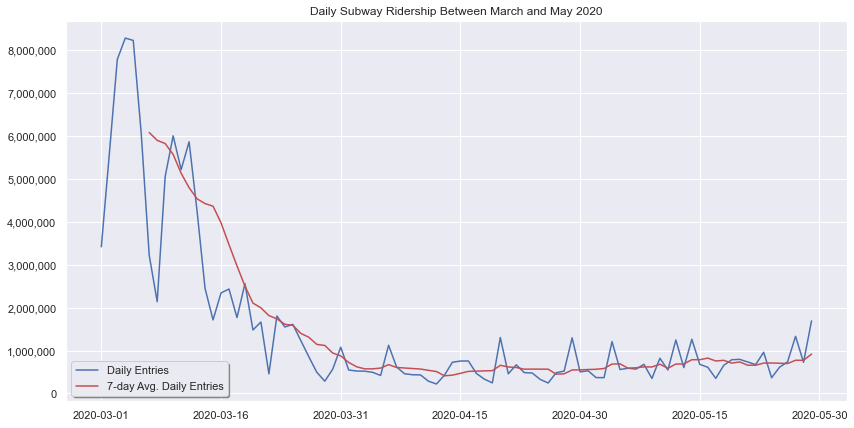

In [122]:
#fig = plt.figure(figsize = [15, 10])
#ax = fig.add_subplot()

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(sum_daily.DATE, sum_daily.DAILY_ENTRIES, label='Daily Entries')
ax.plot(sum_daily.DATE, sum_daily['seven_day_rolling_avg'], c='r', label='7-day Avg. Daily Entries')
ax.set_title('Daily Subway Ridership Between March and May 2020')
ax.legend(shadow = True, loc = 3)
ax.ticklabel_format(axis='y', style='plain')
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'));

## Import Citi Bike data from SQL DB

In [25]:
con = sqlite3.connect("citi_bike.db")

query = '''
SELECT starttime, startstationname
from tripdata;
'''

# Load the data into a DataFrame
bike_df = pd.read_sql_query(query, con, parse_dates='starttime')

con.close()

In [26]:
bike_df.head()

,starttime,startstationname
0,2020-03-01 00:00:03.640,Spruce St & Nassau St
1,2020-03-01 00:00:16.756,Lafayette St & E 8 St
2,2020-03-01 00:00:20.058,W 31 St & 7 Ave
3,2020-03-01 00:00:24.351,Perry St & Greenwich Ave
4,2020-03-01 00:00:26.112,St Marks Pl & 2 Ave


In [27]:
#bike_daily = bike_df.groupby(bike_df.starttime.dt.isocalendar().week).starttime.count().to_frame()
bike_daily = bike_df.groupby(bike_df.starttime.dt.date).starttime.count().to_frame()
bike_daily['seven_day_rolling_avg'] = bike_daily.starttime.rolling(7).mean()

In [28]:
bike_daily.head(8)

,starttime,seven_day_rolling_avg
starttime,,
2020-03-01,31878,NaN
2020-03-02,56946,NaN
2020-03-03,49723,NaN
2020-03-04,58670,NaN
2020-03-05,58686,NaN
2020-03-06,34135,NaN
2020-03-07,39448,47069.428571
2020-03-08,46994,49228.857143


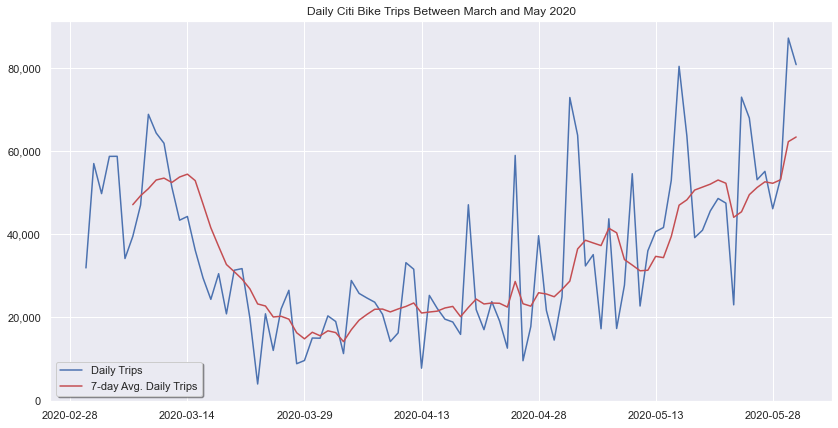

In [29]:
#fig = plt.figure(figsize = [15, 10])
#ax = fig.add_subplot()

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(bike_daily.index, bike_daily.starttime, label='Daily Trips')
ax.plot(bike_daily.index, bike_daily.seven_day_rolling_avg, c='r', label='7-day Avg. Daily Trips')
ax.set_title('Daily Citi Bike Trips Between March and May 2020')
ax.legend(shadow = True, loc = 3)
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'));
#ax.set_xlim([dt.date(2020, 3, 1), dt.date(2020, 5, 31)])

# Some Preliminary Plots 

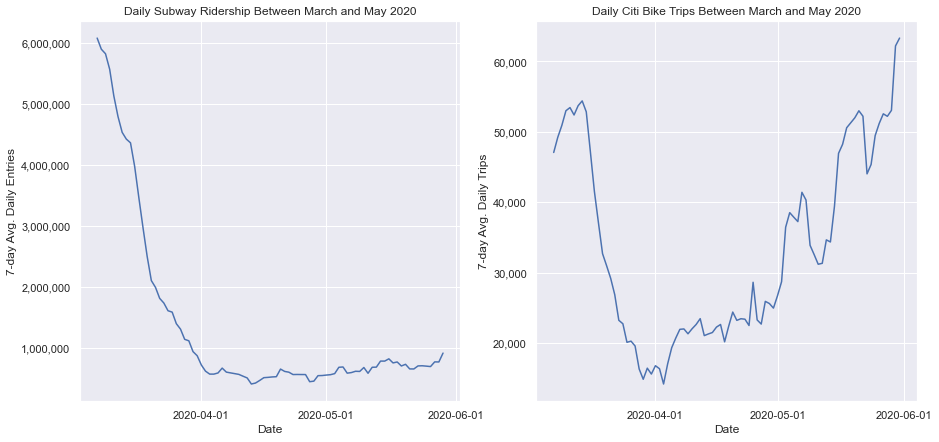

In [123]:
#plt.figure(figsize=[16,7])  

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

ax1.plot(sum_daily.DATE, sum_daily.seven_day_rolling_avg)
ax1.set(xlabel='Date', ylabel="7-day Avg. Daily Entries",
       title="Daily Subway Ridership Between March and May 2020")
ax1.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.grid(True);

ax2.plot(bike_daily.index, bike_daily.seven_day_rolling_avg)
ax2.set(xlabel='Date', ylabel="7-day Avg. Daily Trips",
       title='Daily Citi Bike Trips Between March and May 2020')
ax2.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.grid(True);

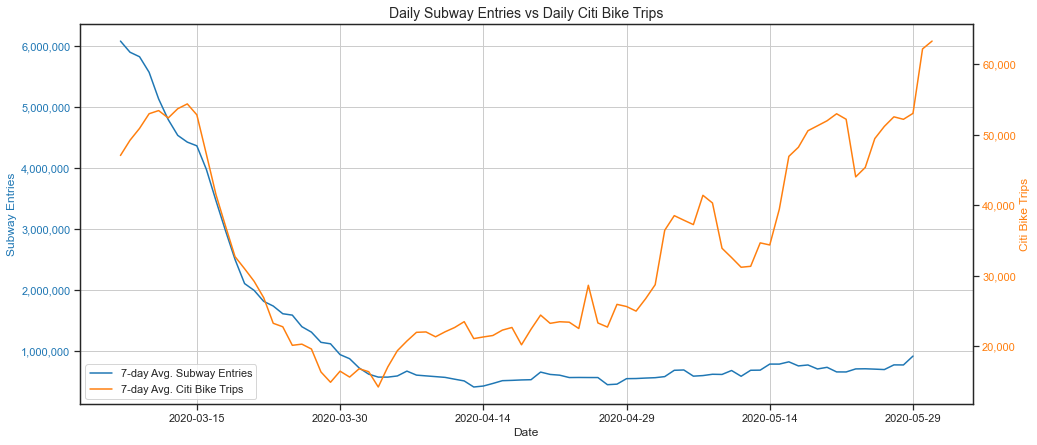

In [160]:
# Set seaborn style to ticks
sns.set_style('ticks')

fig, ax1 = plt.subplots(figsize=(16, 7))

p1, = ax1.plot(sum_daily.DATE, sum_daily.seven_day_rolling_avg,
               c='tab:blue', label='7-day Avg. Subway Entries')
ax1.set_title('Daily Subway Entries vs Daily Citi Bike Trips', fontsize=14)
ax1.set_xlabel('Date')
ax1.set_ylabel('Subway Entries', color='tab:blue')
ax1.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx() 

p2, =ax2.plot(bike_daily.index, bike_daily.seven_day_rolling_avg,
              c='tab:orange', label='7-day Avg. Citi Bike Trips')
ax2.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_ylabel("Citi Bike Trips", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
lns = [p1, p2]
ax1.legend(handles=lns, loc=3)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=15))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'));

plt.savefig('result_2020_16x7.png')

## Calculating the drop for each subway station

In [125]:
# Define drop as the difference between the max and min of 7-day avg entries over the period
# Start from station daily entires table
station_daily.head()

,STATION,LINENAME,DATE,DAILY_ENTRIES
0,1 AV,L,03/01/2020,4977.0
1,1 AV,L,03/02/2020,15110.0
2,1 AV,L,03/03/2020,15875.0
3,1 AV,L,03/04/2020,14664.0
4,1 AV,L,03/05/2020,16103.0


In [126]:
# Add rolling 7-day average daily entries
station_daily['seven_day_rolling_avg'] = station_daily.groupby('STATION')['DAILY_ENTRIES'].rolling(7).mean().reset_index(0, drop=True)
station_daily.head(10)

,STATION,LINENAME,DATE,DAILY_ENTRIES,seven_day_rolling_avg
0,1 AV,L,03/01/2020,4977.0,NaN
1,1 AV,L,03/02/2020,15110.0,NaN
2,1 AV,L,03/03/2020,15875.0,NaN
3,1 AV,L,03/04/2020,14664.0,NaN
4,1 AV,L,03/05/2020,16103.0,NaN
5,1 AV,L,03/06/2020,16437.0,NaN
6,1 AV,L,03/07/2020,6634.0,12828.571429
7,1 AV,L,03/08/2020,4229.0,12721.714286
8,1 AV,L,03/09/2020,13907.0,12549.857143
9,1 AV,L,03/10/2020,14700.0,12382.000000


In [129]:
station_drop = station_daily[['STATION', 'LINENAME', 'seven_day_rolling_avg']].groupby(['STATION', 'LINENAME']).agg(['max', 'min']).reset_index()
station_drop.columns = ['_'.join(col).rstrip('_') for col in station_drop.columns.values]
station_drop

,STATION,LINENAME,seven_day_rolling_avg_max,seven_day_rolling_avg_min
0,1 AV,L,112996.428571,1100.857143
1,103 ST,1,10076.000000,818.142857
2,103 ST,6,11380.714286,1736.714286
3,103 ST,BC,3980.857143,353.428571
4,103 ST-CORONA,7,18151.571429,1888.428571
...,...,...,...,...
474,WOODLAWN,4,5653.857143,838.571429
475,WORLD TRADE CTR,ACE23,75691.000000,434.857143
476,WTC-CORTLANDT,1,12937.142857,321.428571
477,YORK ST,F,10862.142857,418.714286


In [130]:
station_drop['drop_%'] = (station_drop.seven_day_rolling_avg_max - 
                          station_drop.seven_day_rolling_avg_min) / station_drop.seven_day_rolling_avg_max
station_drop

,STATION,LINENAME,seven_day_rolling_avg_max,seven_day_rolling_avg_min,drop_%
0,1 AV,L,112996.428571,1100.857143,0.990258
1,103 ST,1,10076.000000,818.142857,0.918803
2,103 ST,6,11380.714286,1736.714286,0.847398
3,103 ST,BC,3980.857143,353.428571,0.911218
4,103 ST-CORONA,7,18151.571429,1888.428571,0.895963
...,...,...,...,...,...
474,WOODLAWN,4,5653.857143,838.571429,0.851682
475,WORLD TRADE CTR,ACE23,75691.000000,434.857143,0.994255
476,WTC-CORTLANDT,1,12937.142857,321.428571,0.975155
477,YORK ST,F,10862.142857,418.714286,0.961452


In [131]:
station_drop.sort_values('drop_%', inplace=True, ascending=False)
station_drop

,STATION,LINENAME,seven_day_rolling_avg_max,seven_day_rolling_avg_min,drop_%
388,NEWARK HM HE,1,3842.571429,0.000000,1.000000
446,THIRTY ST,1,42824.000000,3.857143,0.999910
153,81 ST-MUSEUM,BC,184434.000000,314.285714,0.998296
158,86 ST,BC,171378.428571,402.857143,0.997649
243,CENTRAL PK N110,23,7253.571429,21.000000,0.997105
...,...,...,...,...,...
23,138/GRAND CONC,45,1768.000000,401.571429,0.772867
202,BEACH 60 ST,A,1788.571429,423.000000,0.763498
463,WAKEFIELD/241,2,4125.714286,1018.285714,0.753186
317,GUN HILL RD,5,1954.000000,507.714286,0.740167


In [148]:
# Filter on stations with daily average 100K entries before covid
station_drop[station_drop.seven_day_rolling_avg_max > 100000]

,STATION,LINENAME,seven_day_rolling_avg_max,seven_day_rolling_avg_min,drop_%
153,81 ST-MUSEUM,BC,184434.000000,314.285714,0.998296
158,86 ST,BC,171378.428571,402.857143,0.997649
78,238 ST,1,123216.428571,428.428571,0.996523
361,LORIMER ST,JM,107894.000000,429.000000,0.996024
296,FRANKLIN AV,ACS,122760.714286,561.857143,0.995423
270,DEKALB AV,L,152421.142857,825.428571,0.994585
90,34 ST-HERALD SQ,BDFMNQRW,630535.857143,4251.857143,0.993257
269,DEKALB AV,BDNQR,146911.285714,1332.142857,0.990932
0,1 AV,L,112996.428571,1100.857143,0.990258
72,23 ST,6,107869.285714,1068.000000,0.990099


In [151]:
# Pickle the table station_drop
import pickle
with open('station_drop.pickle_2020', 'wb') as to_write:
    pickle.dump(station_drop, to_write)